In [1]:
%matplotlib inline
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%load_ext autoreload
%autoreload 2

###  Le réseau récurrent aléatoire: Rôle du poids global

Maintenant que le flux d'entrée est défini, il s'agit ici d'étudier les effets de la manipulation du poids global $W$. Modifier ce paramètre revient à changer tous les poids, hormis celui de la projection entre la source et la population E.

Une simulation d'une seconde est exécutée pour chaque valeur de $W$ appartenant à l'intervalle de sa variation. Des rasterplots représentant l'activité des trois populations du modèle sont alors générés.

Une augmentation de $W$ modifie bien le comportement des populations excitatrice et inhibitrice. Nous pouvons observer pour certaines valeurs de $W$, dans les populations E et I, un comportement de type Asynchronous Regular qui est un des quatres états d'activité décrits par Brunel, dont nous parlerons plus tard.

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


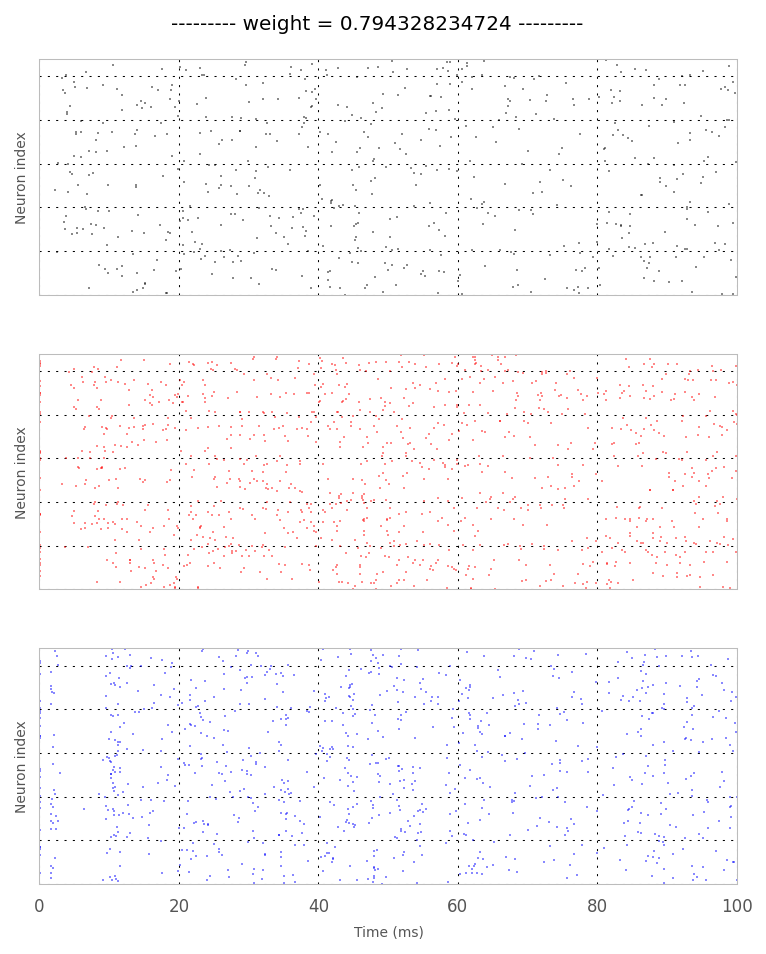

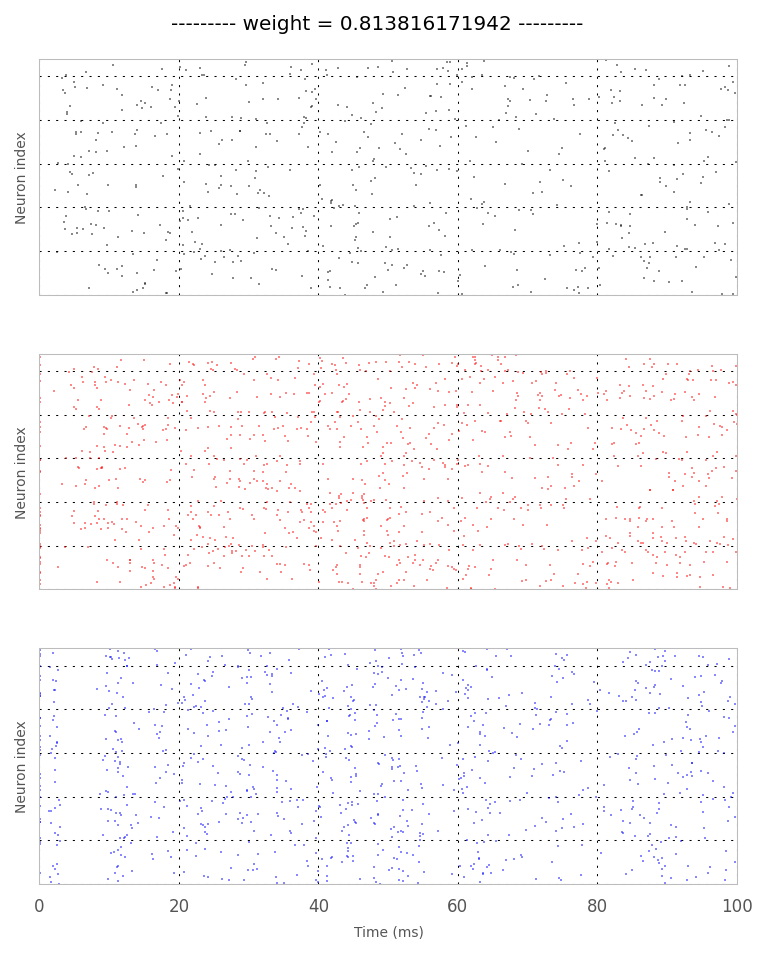

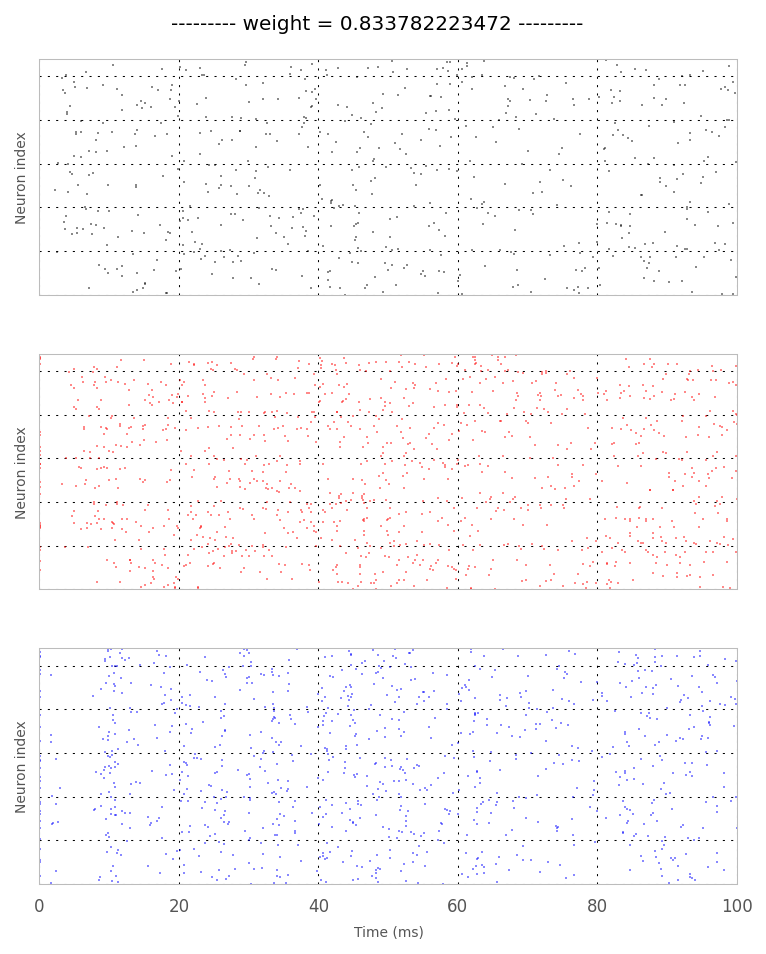

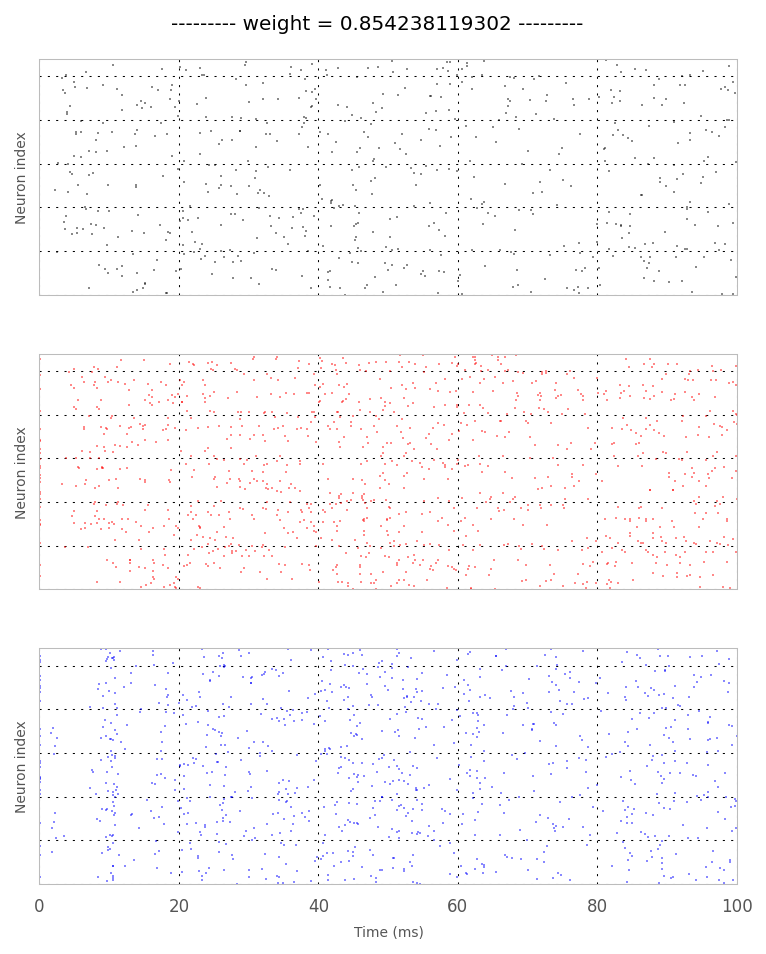

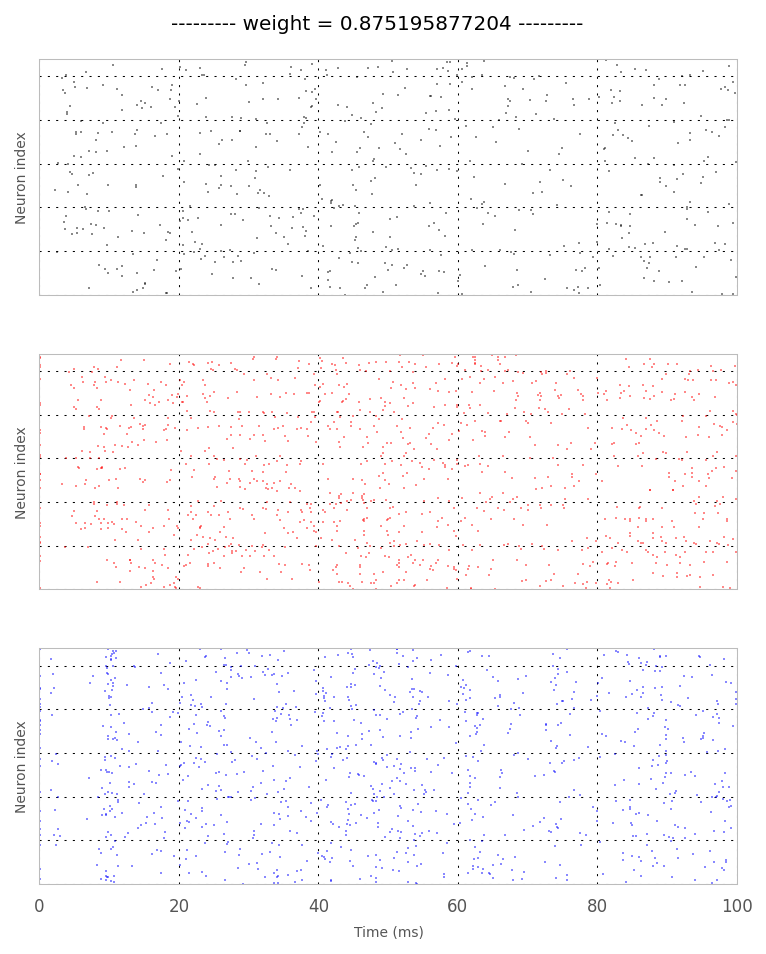

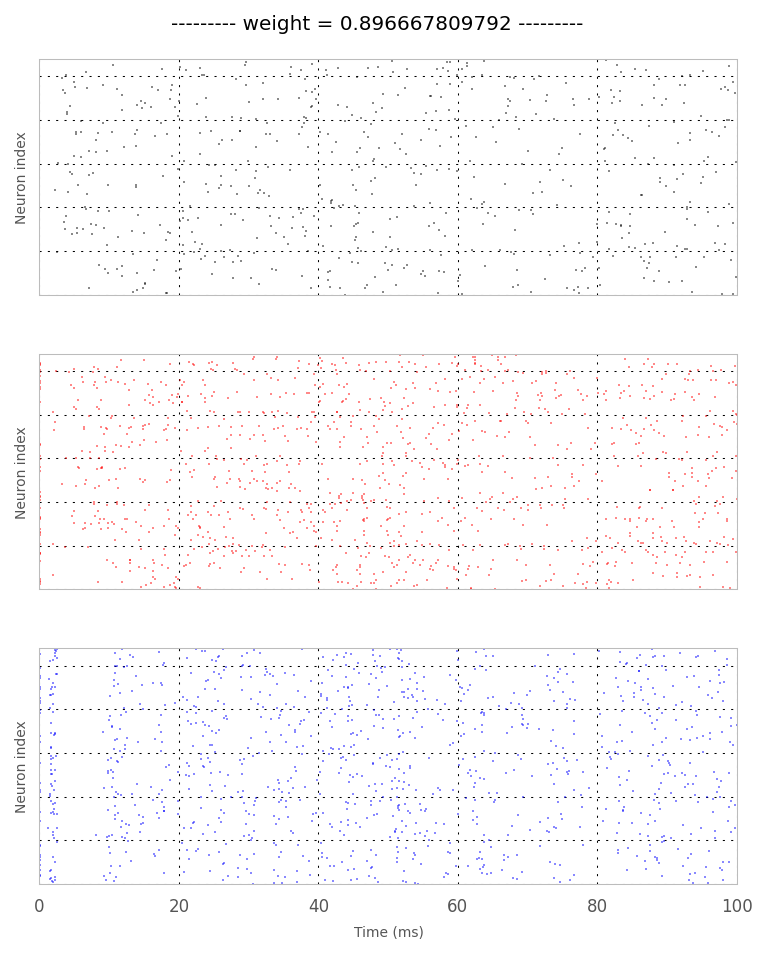

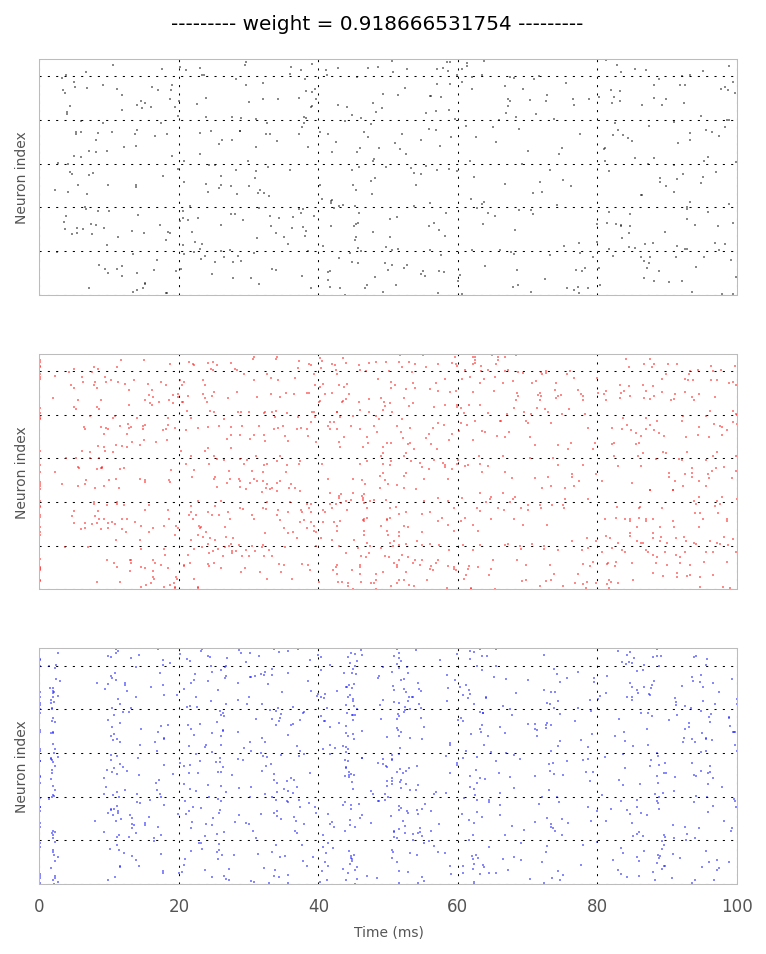

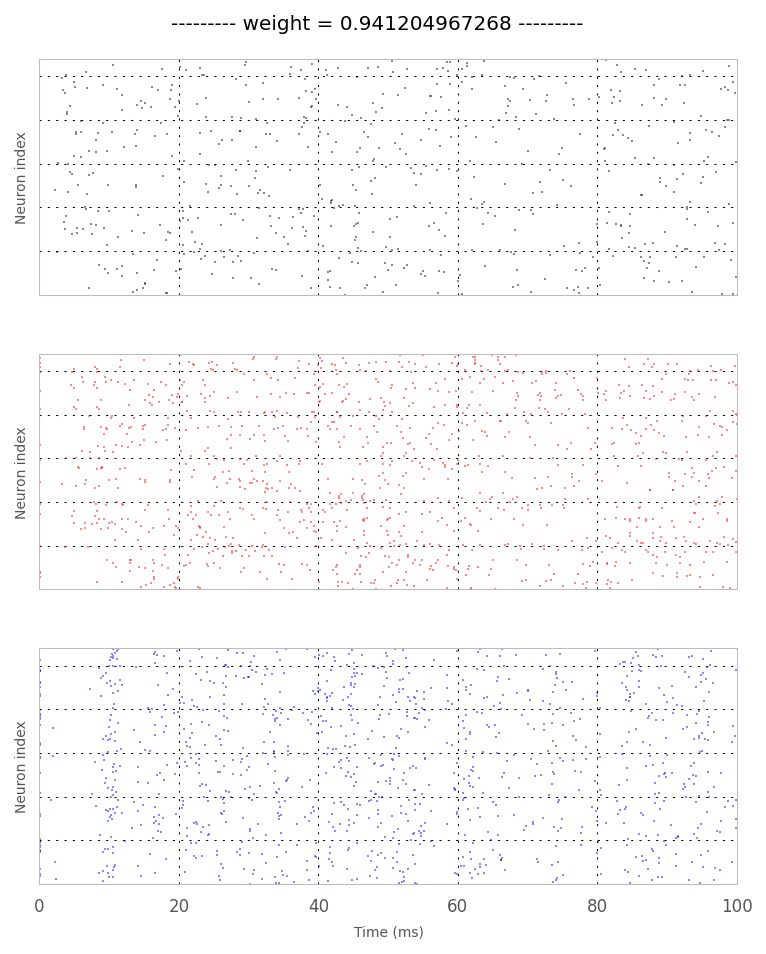

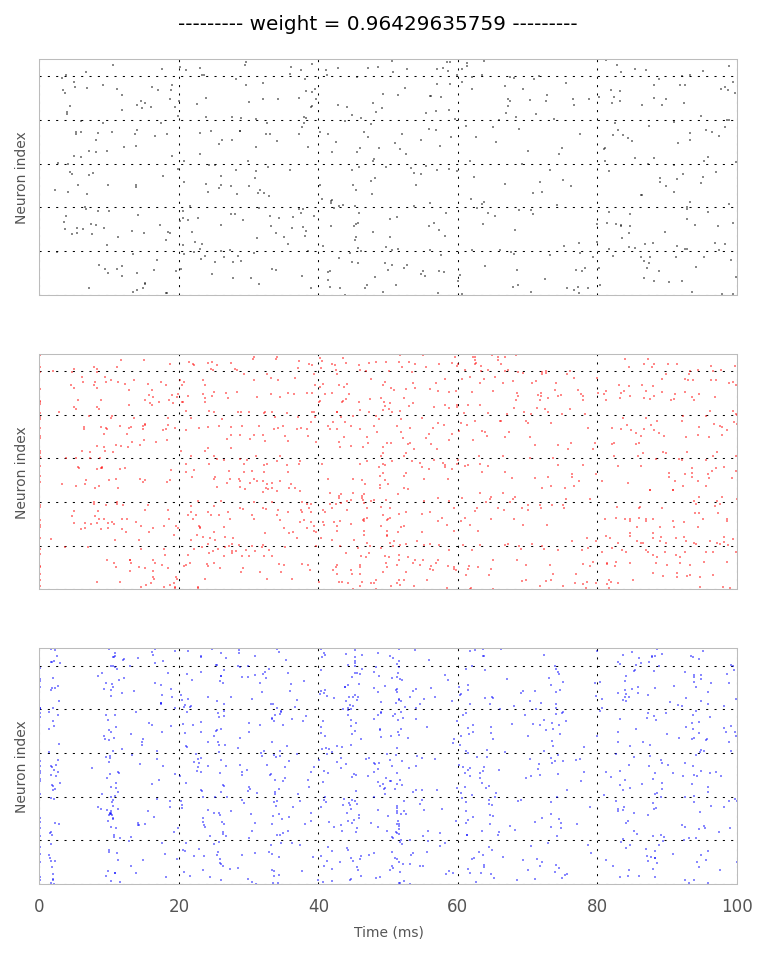

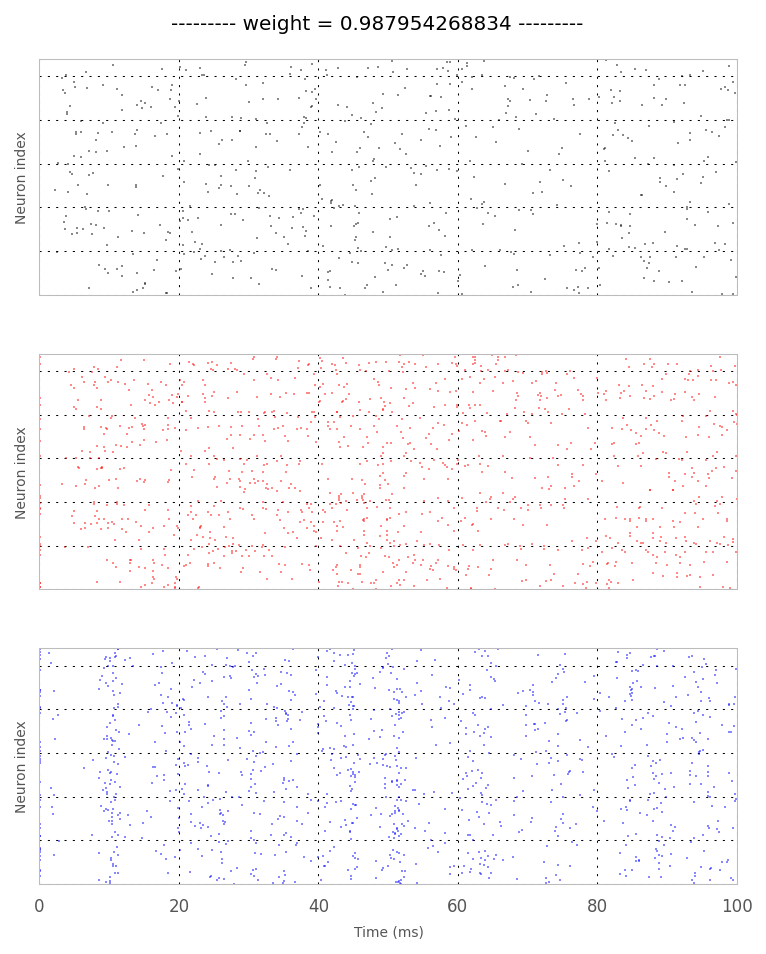

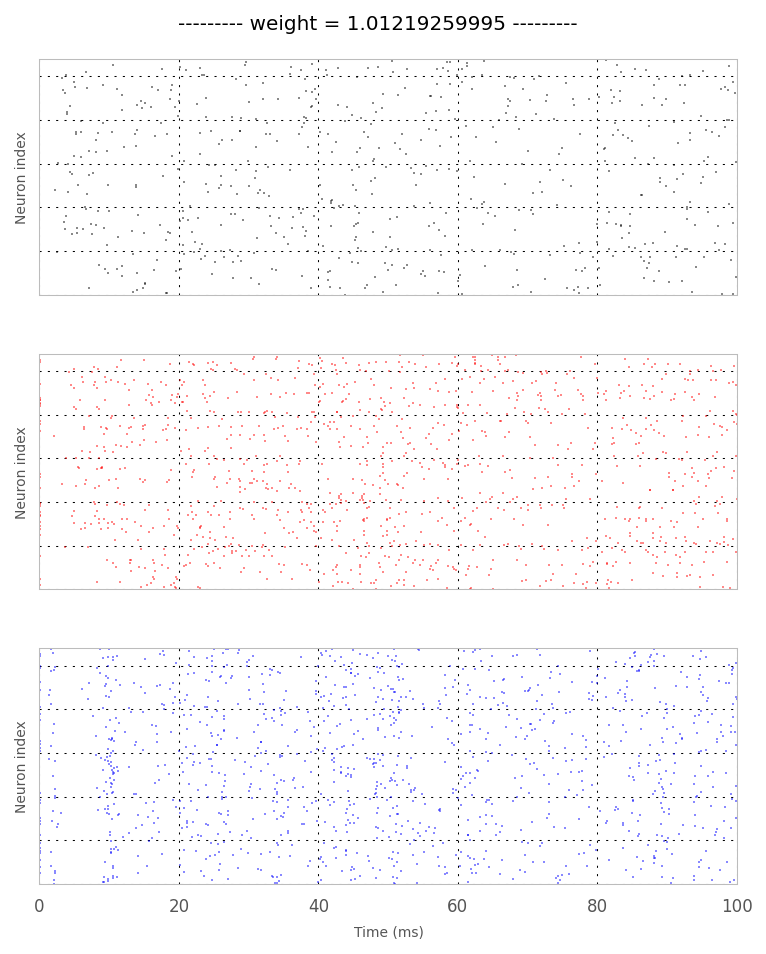

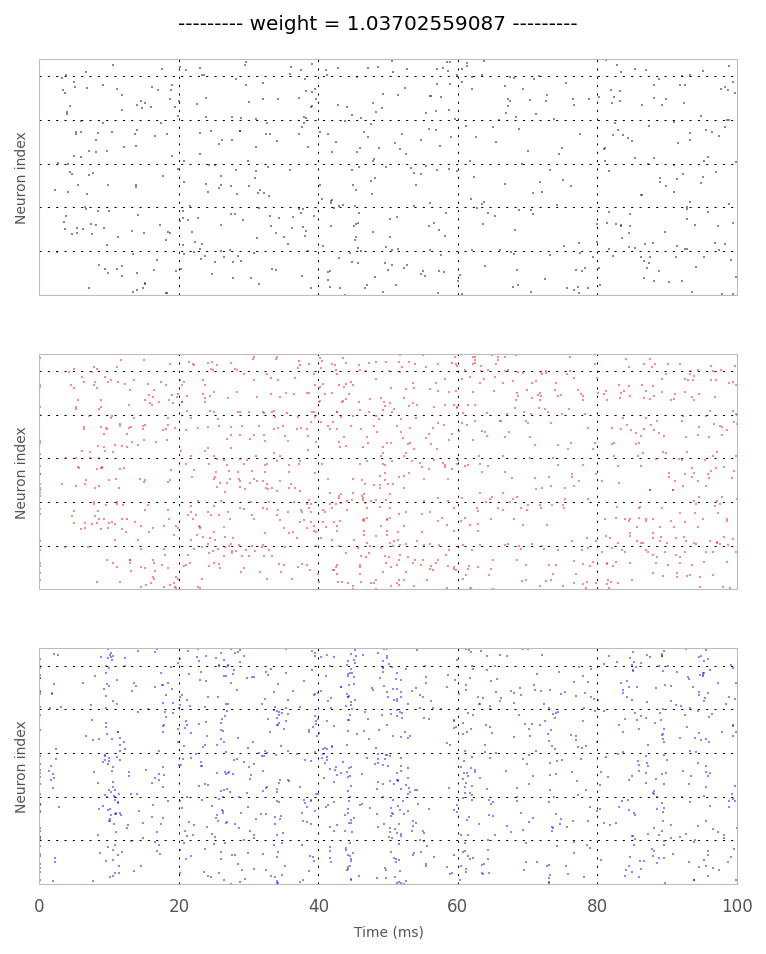

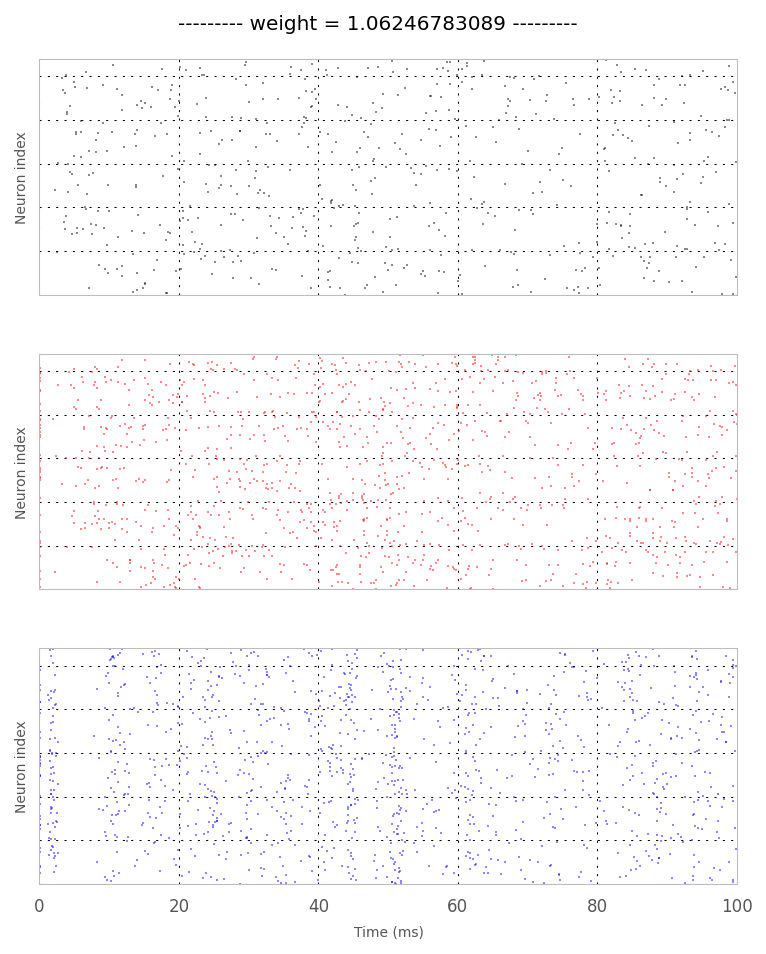

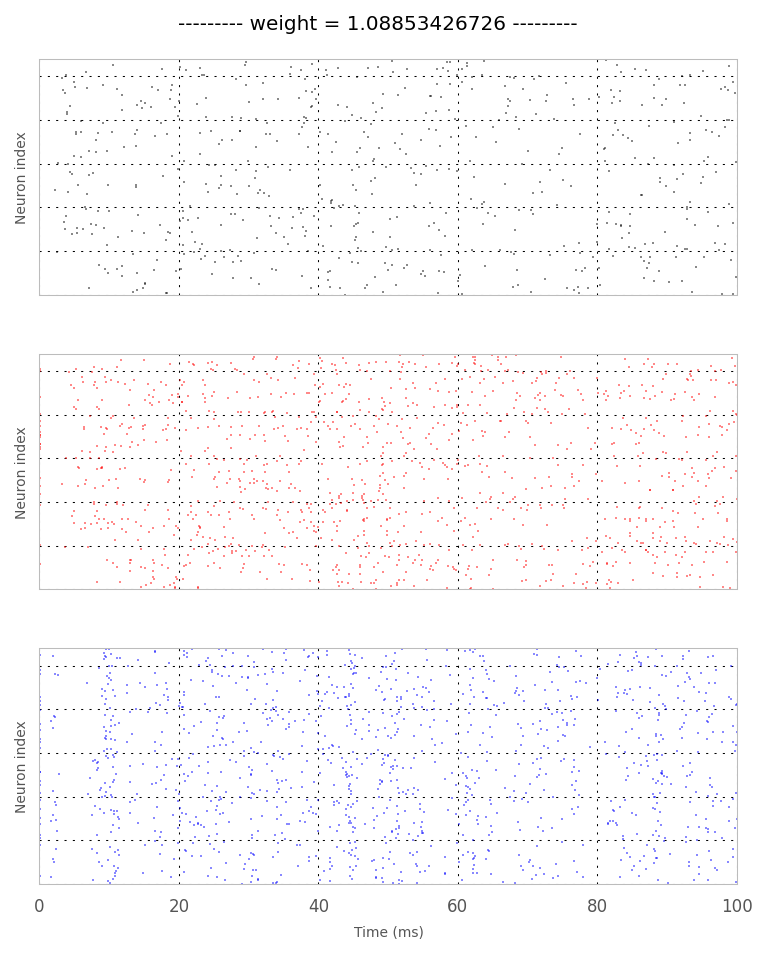

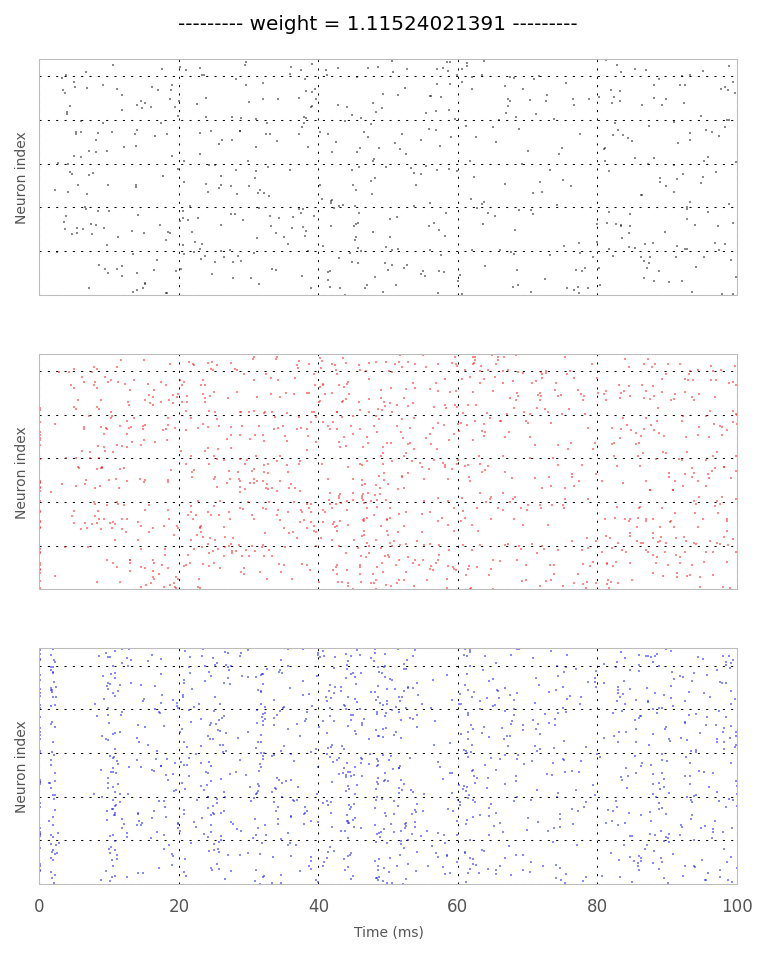

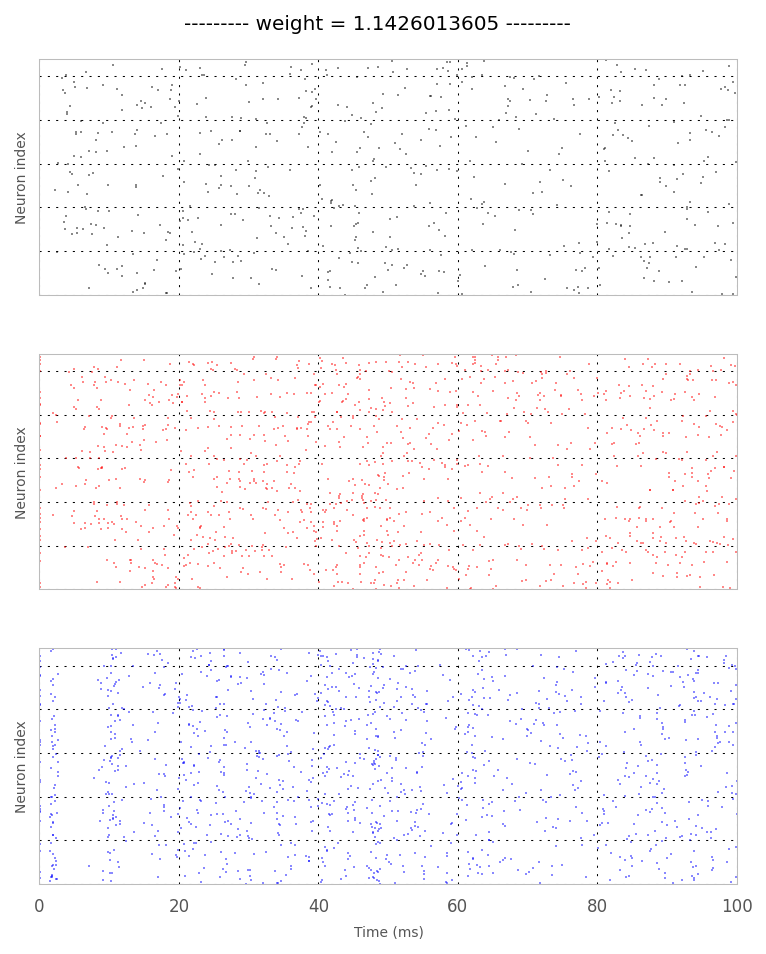

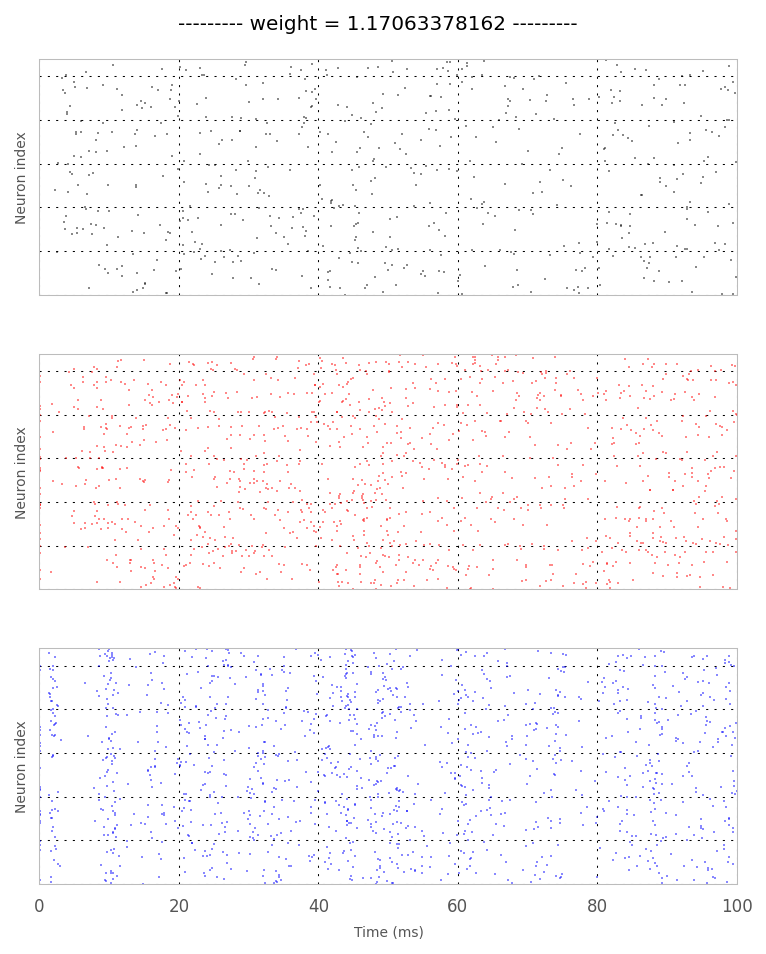

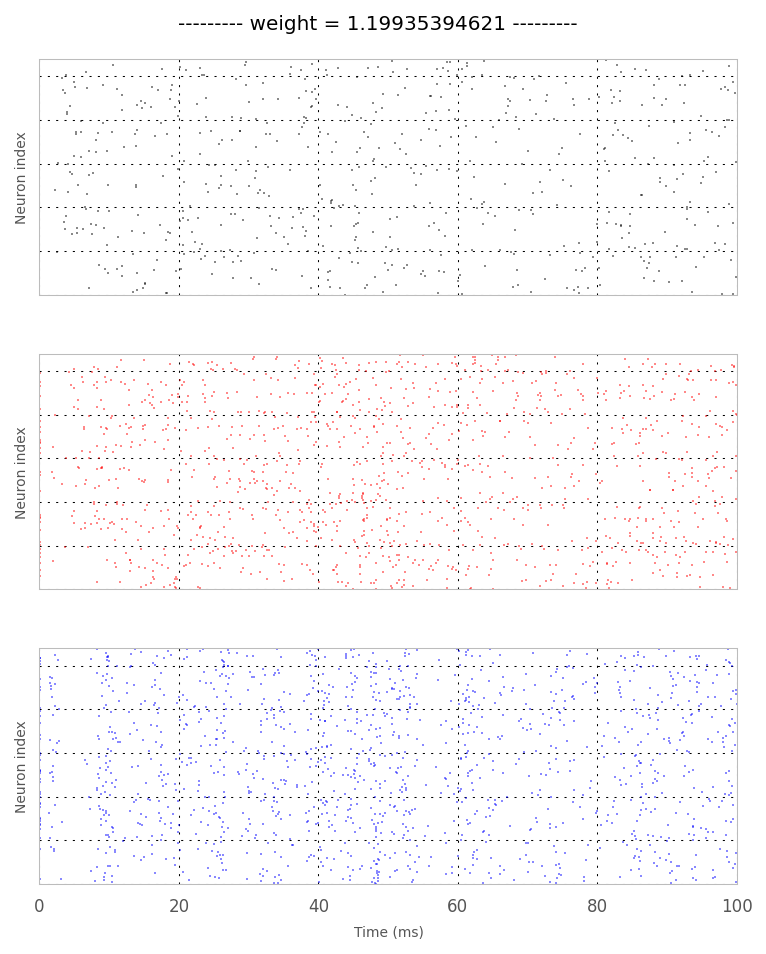

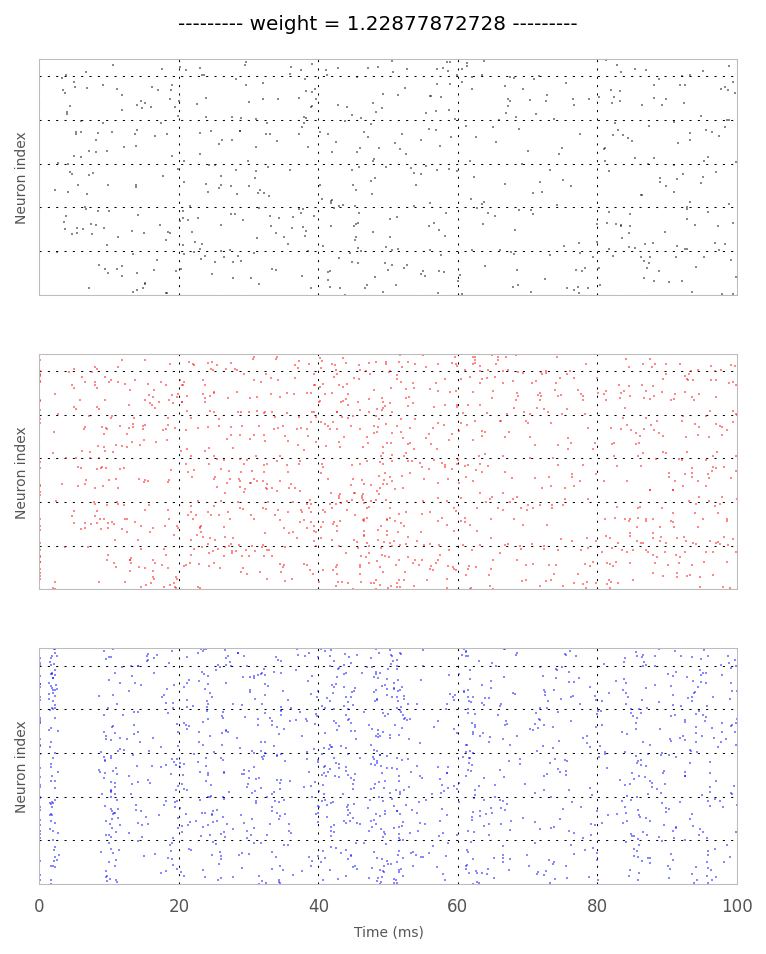

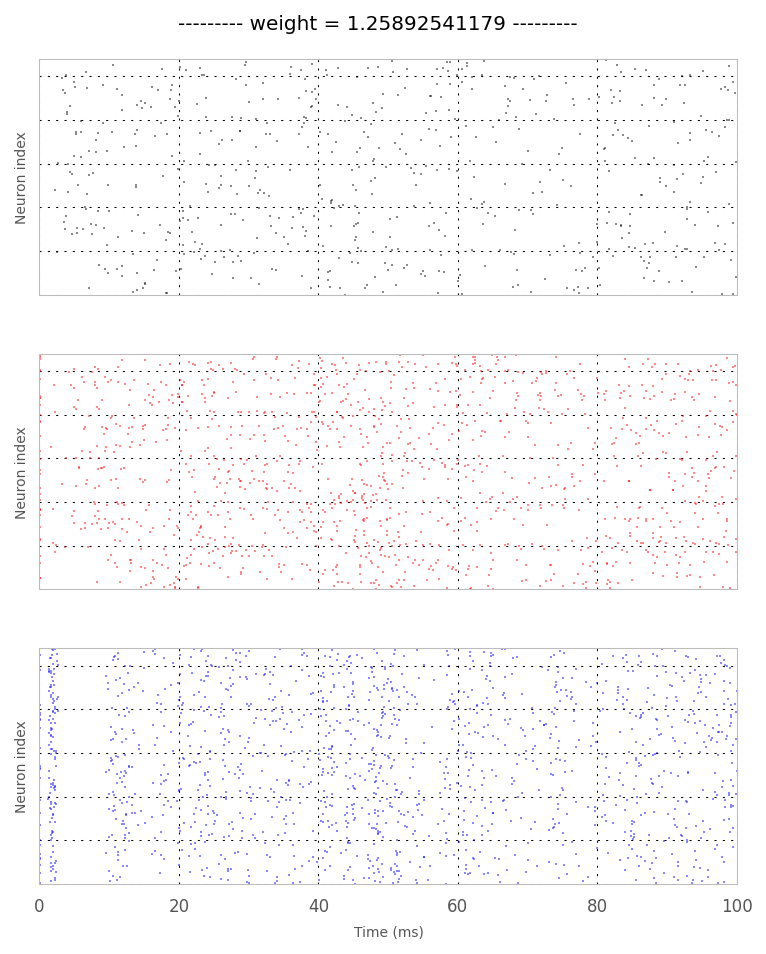

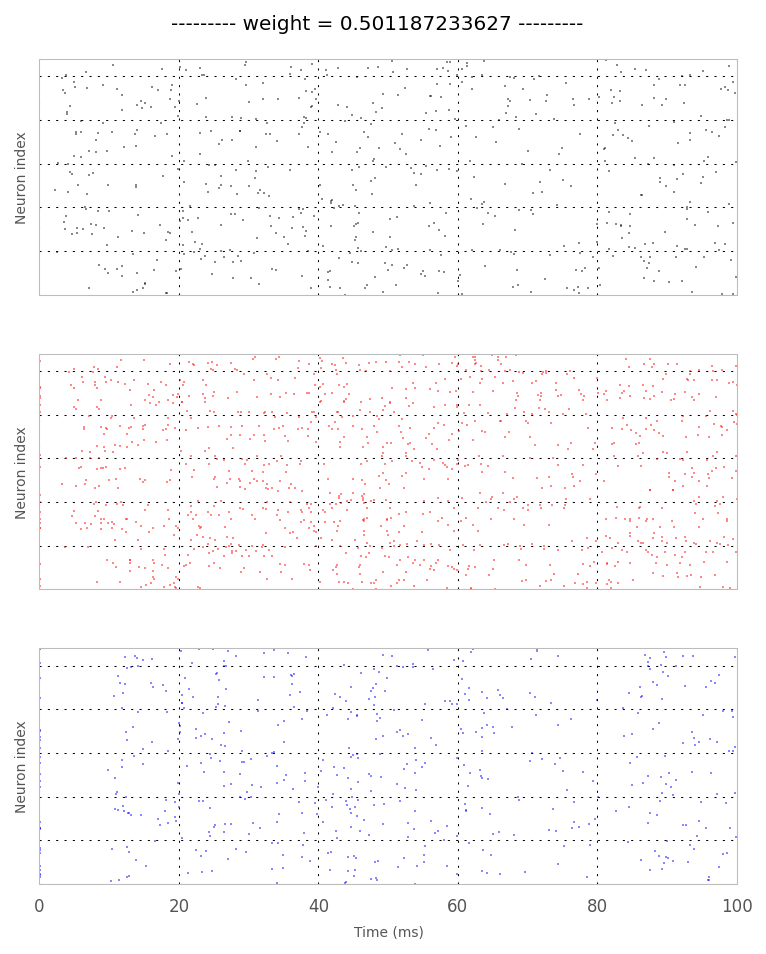

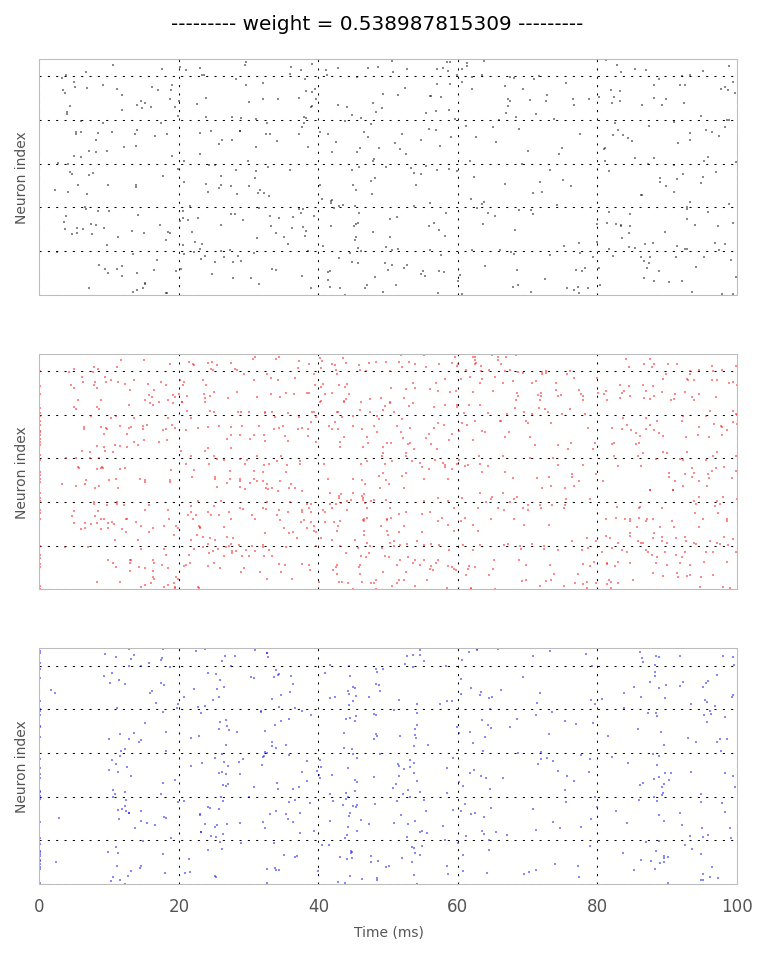

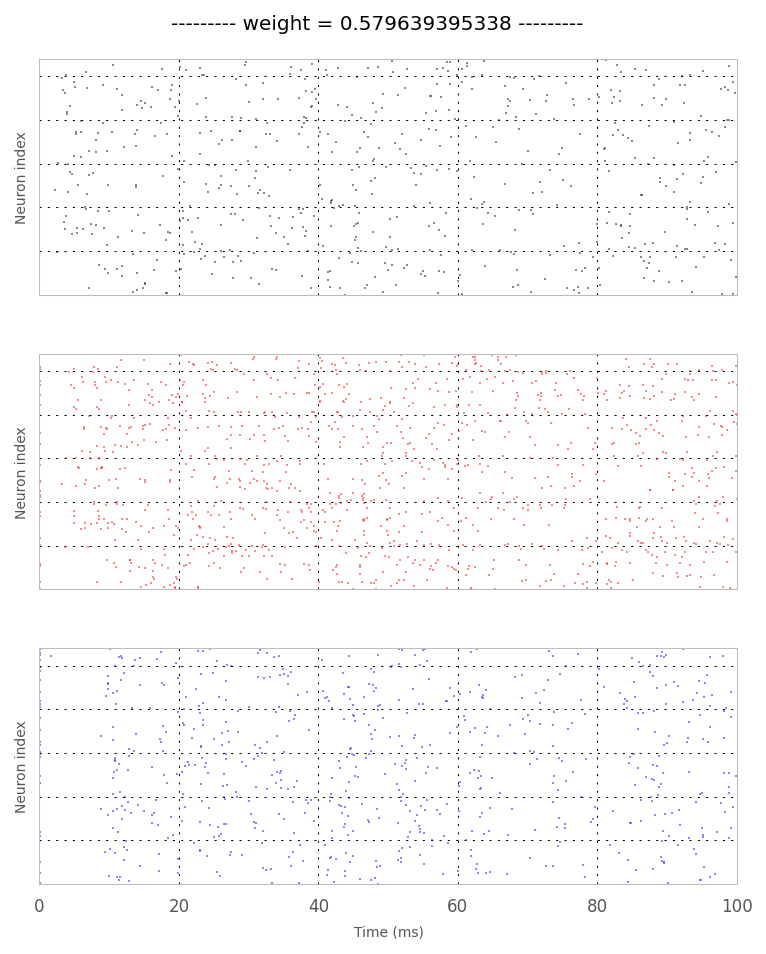

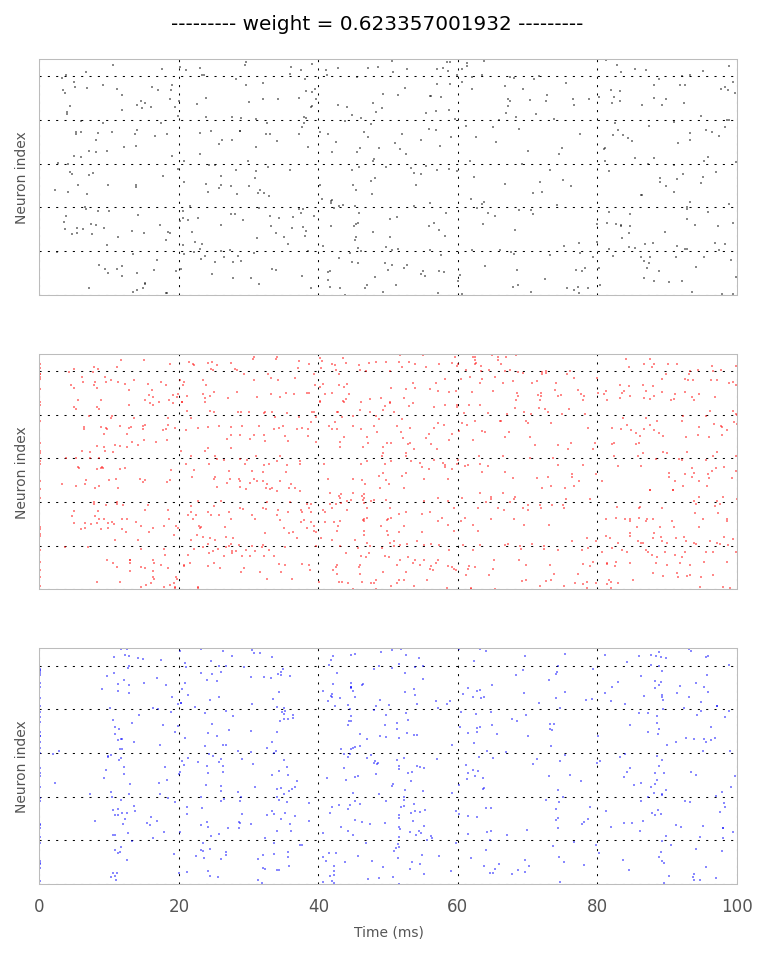

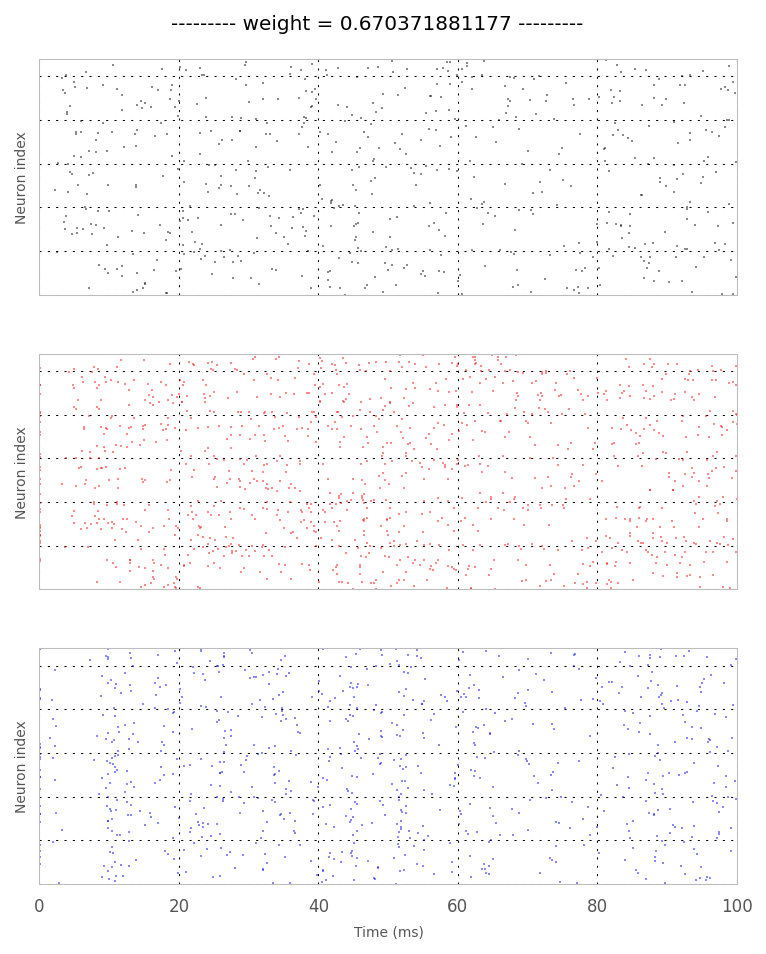

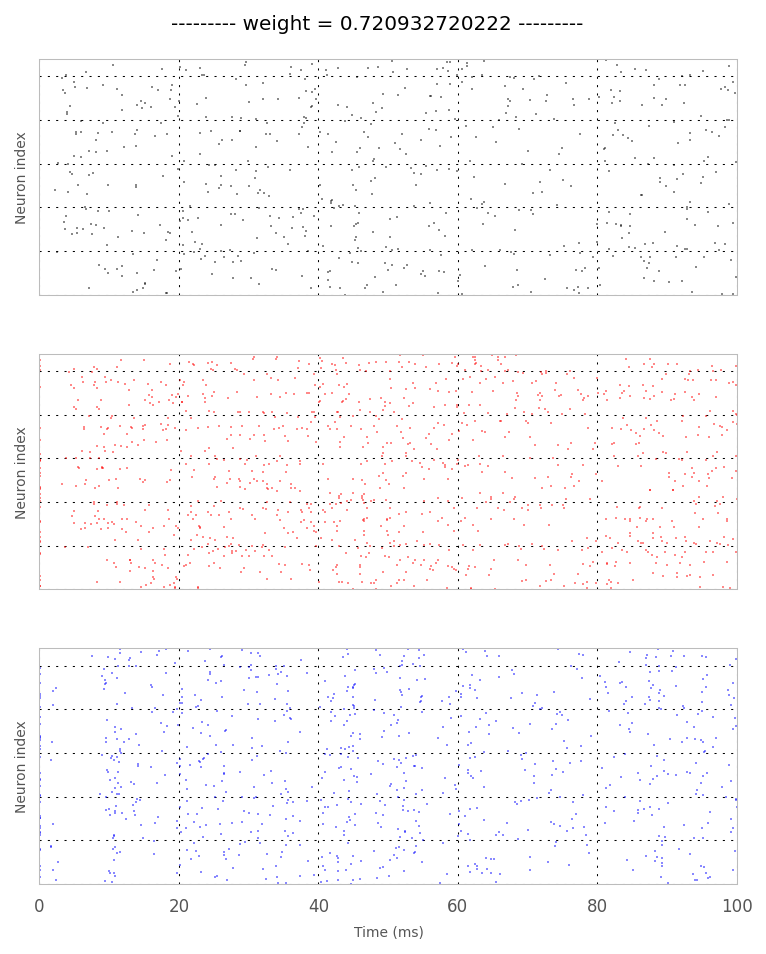

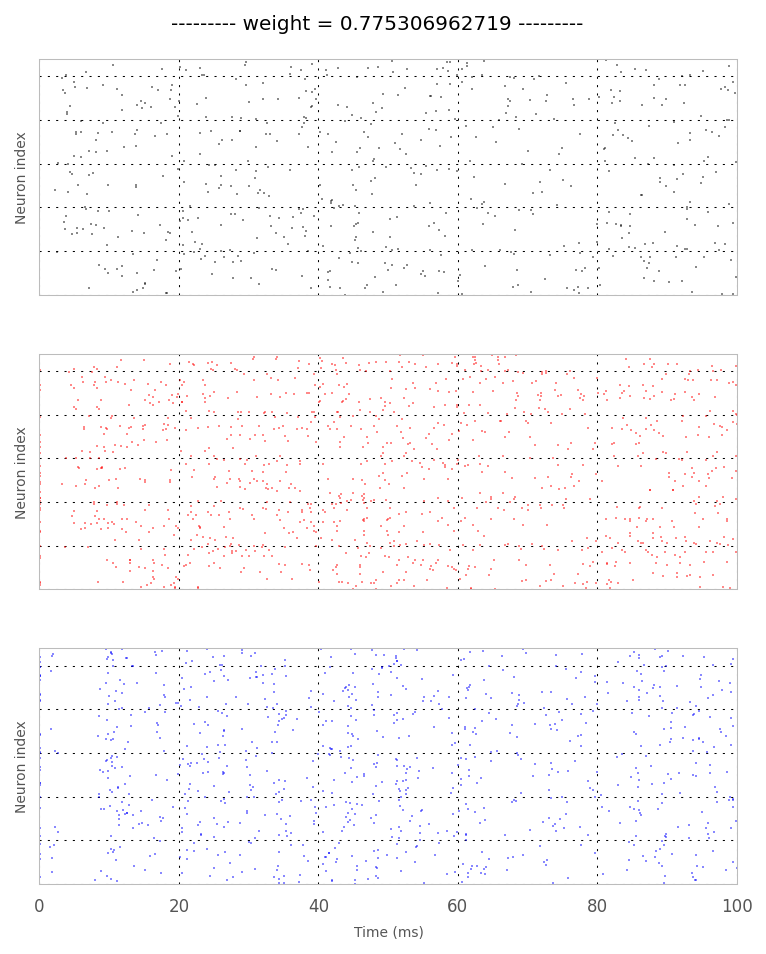

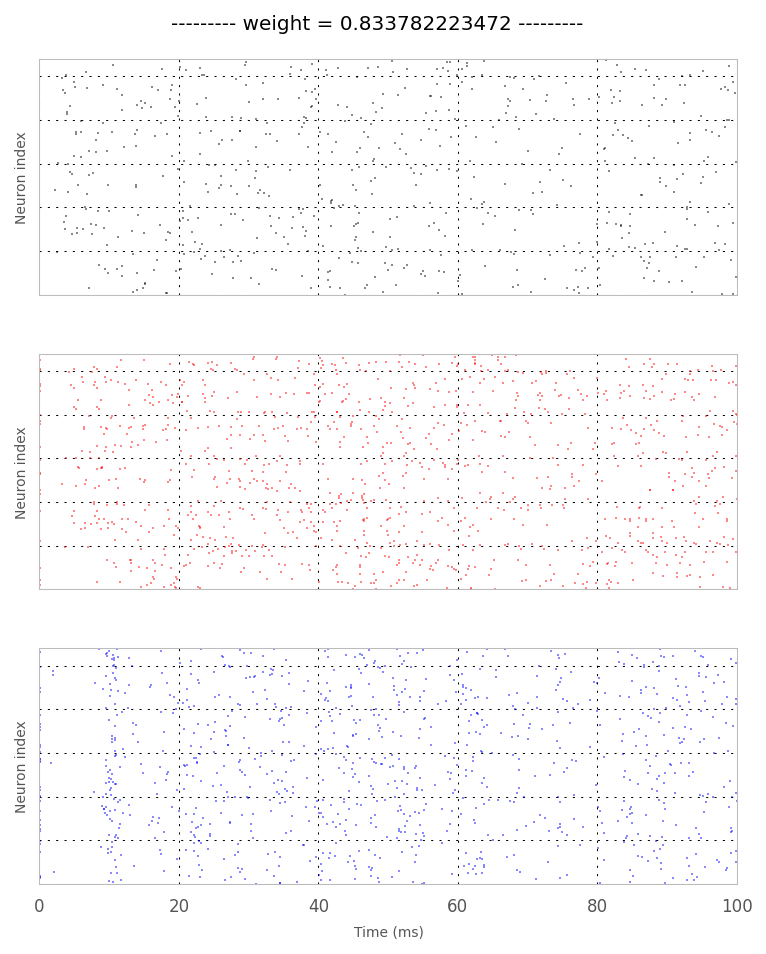

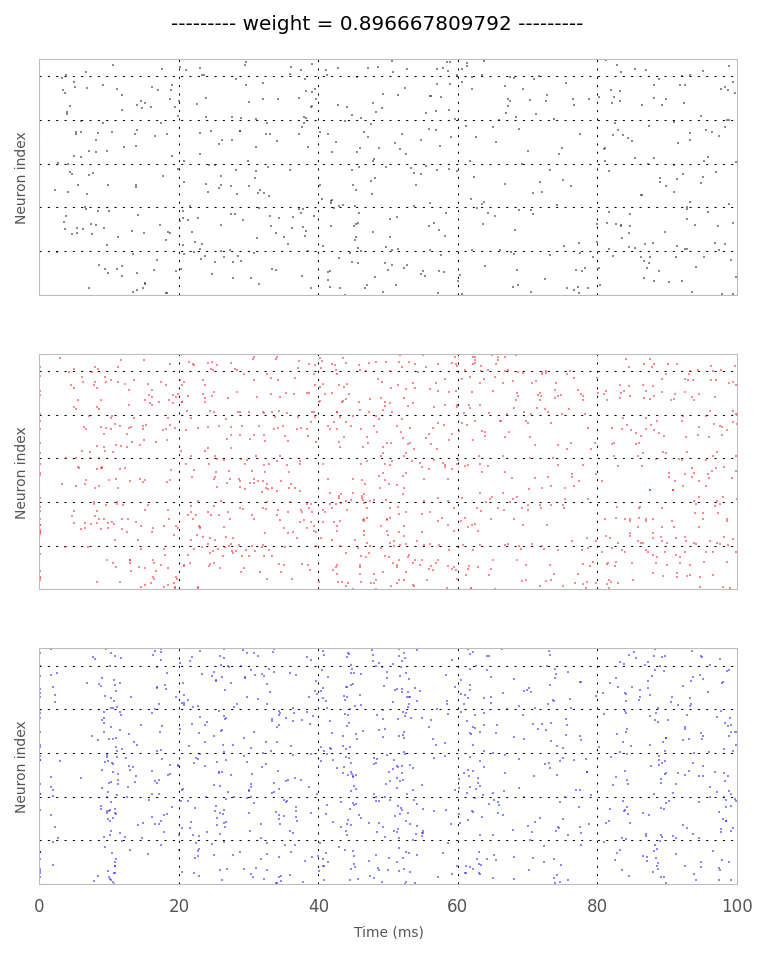

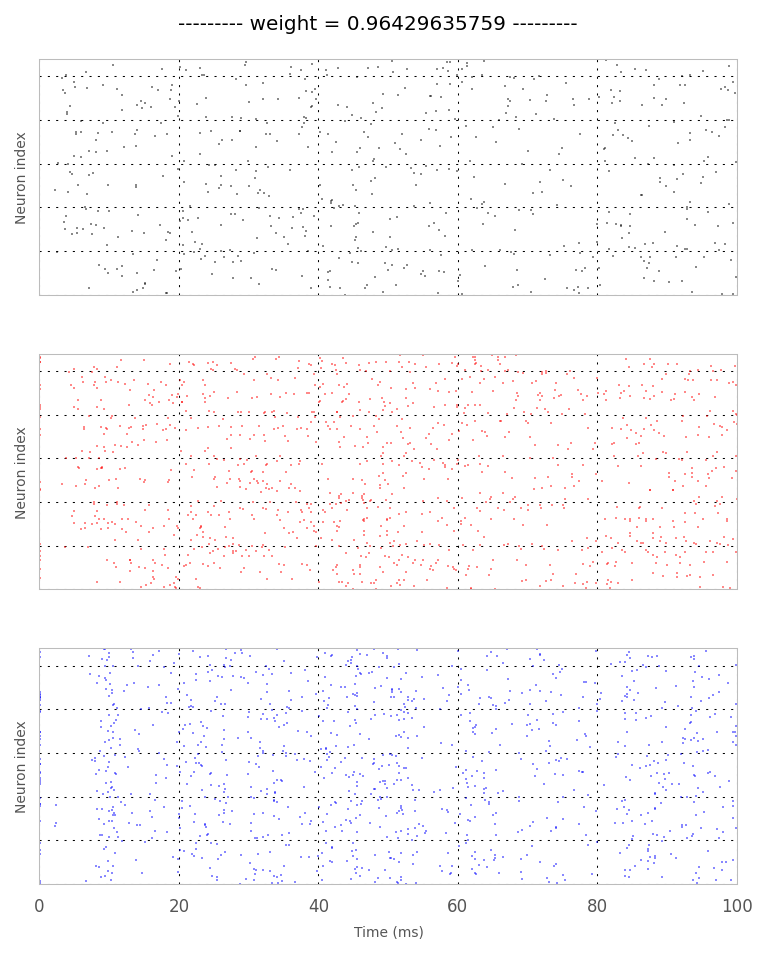

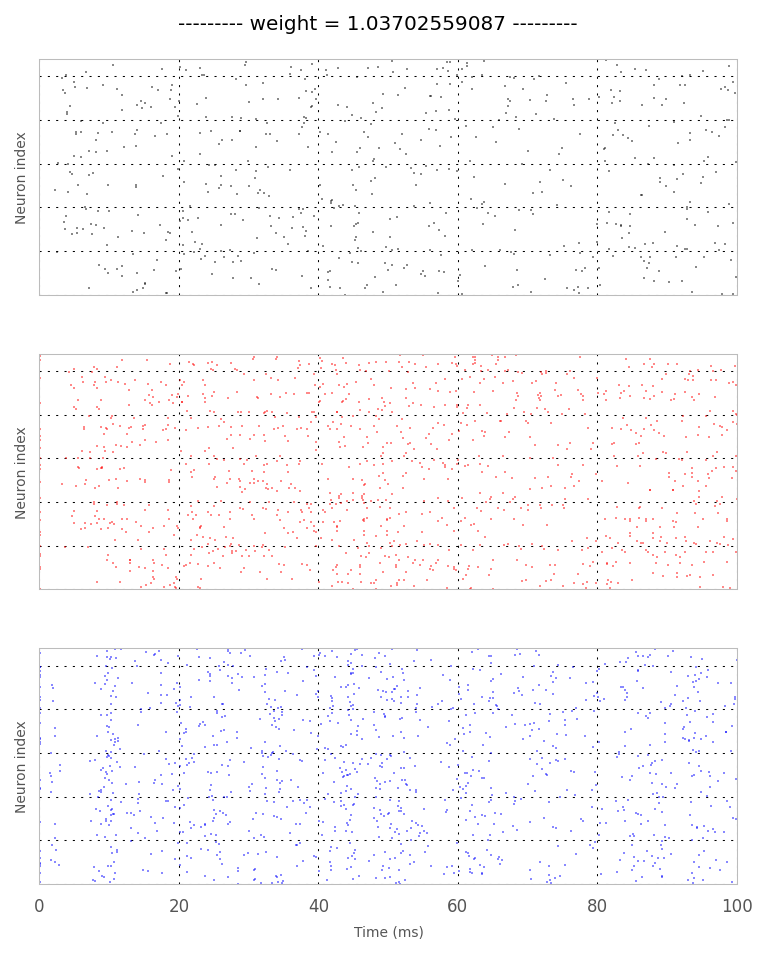

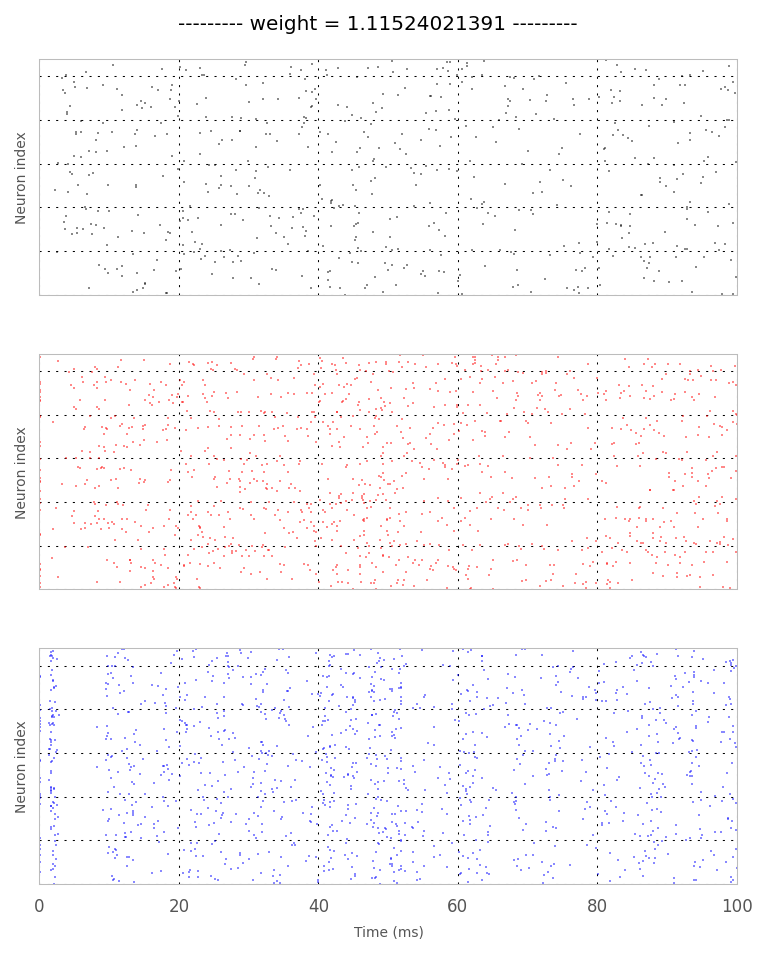

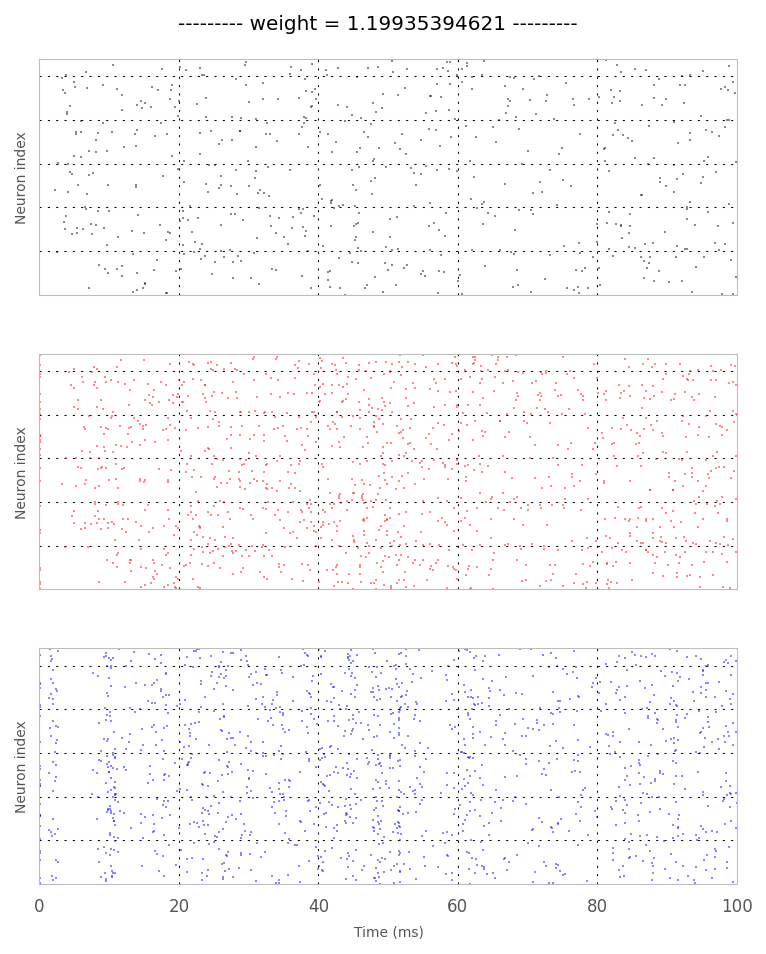

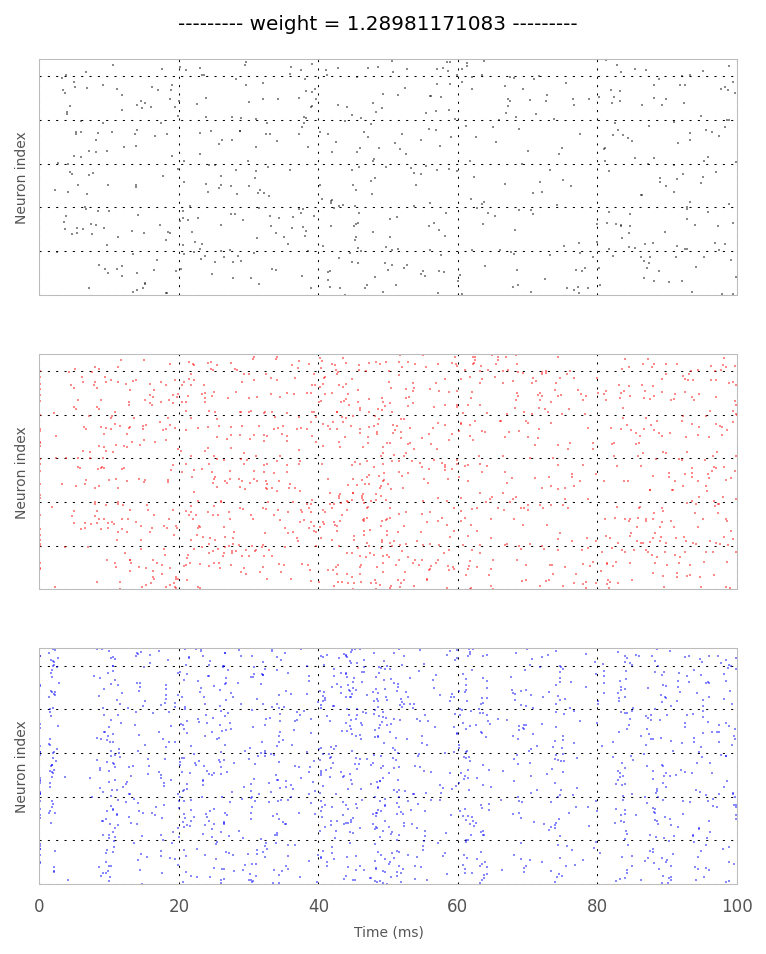

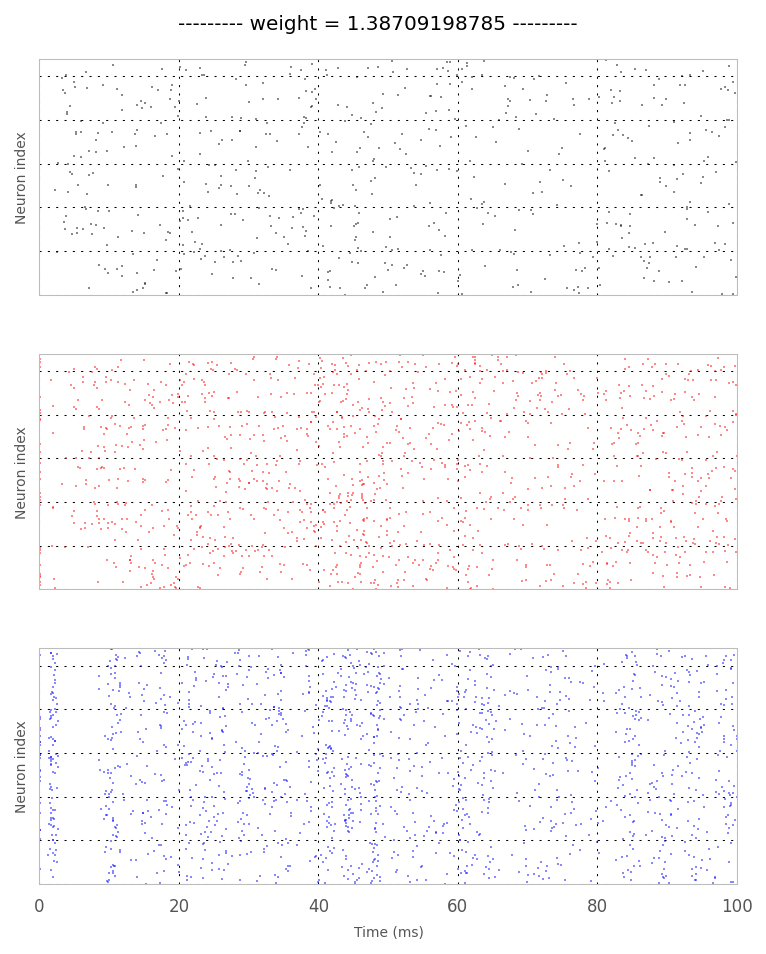

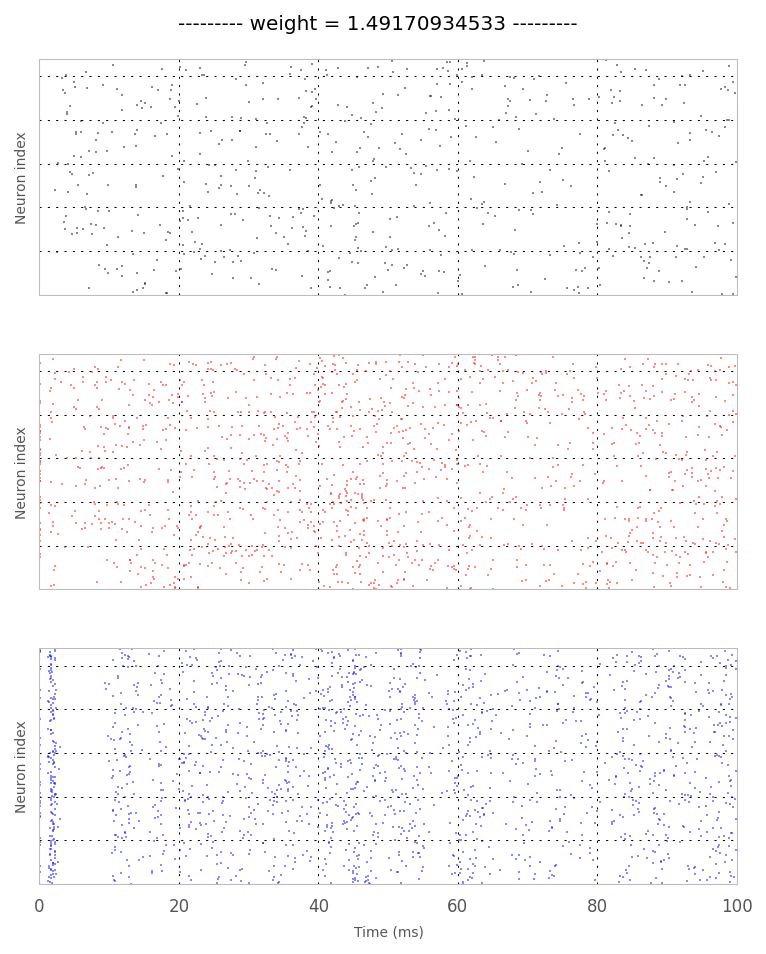

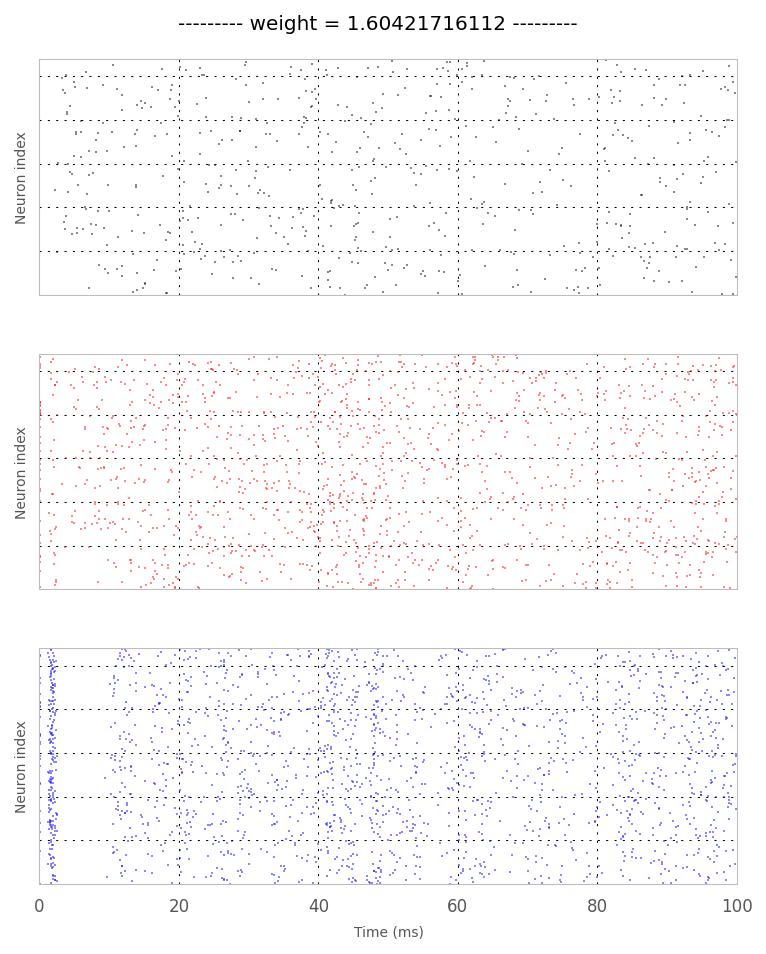

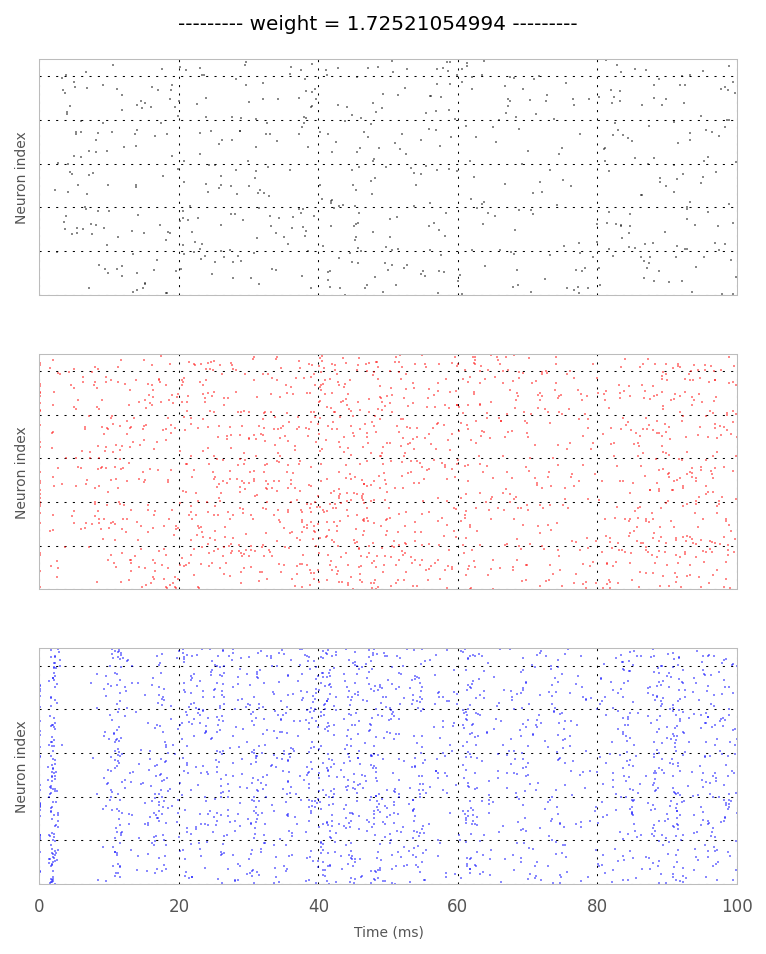

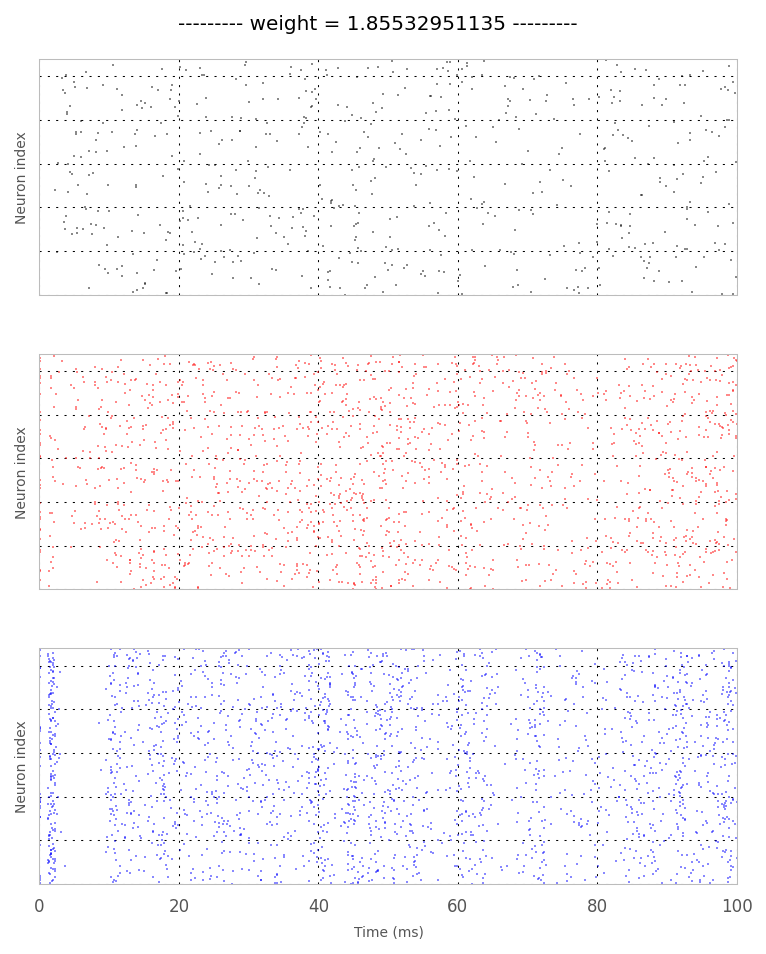

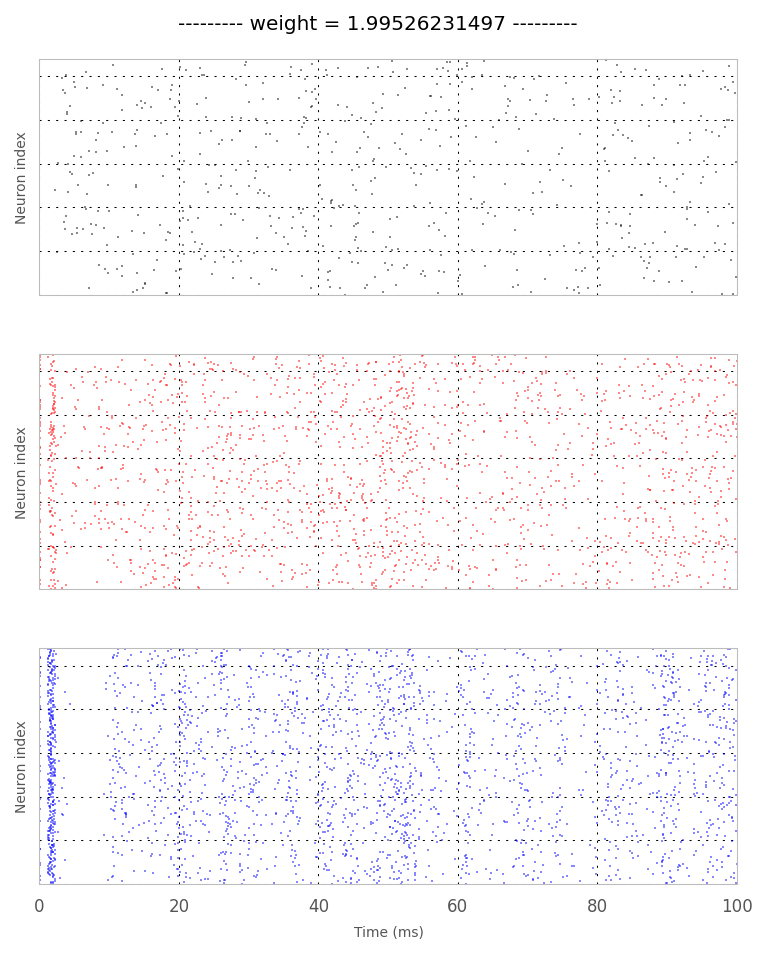

In [2]:
from RRNN import RRNN
import numpy as np
import matplotlib.pyplot as plt
n_sim_each = 20
net = RRNN(ring=False, recurrent=True)
w_0 = net.w

for zoom in [.1, .3]:
    for net.w in w_0 * np.logspace(-zoom, zoom, n_sim_each):
        net.init_params()
#àà        print(net.w, net.sim_params['w_exc_exc'])
        df, spikesE, spikesI = net.model()
        net.Raster(df, spikesE, spikesI, input=True, title='weight = {}'.format(net.w))
        plt.show()